# 1.4.9 

In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [37]:
img = cv2.imread('opencv.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

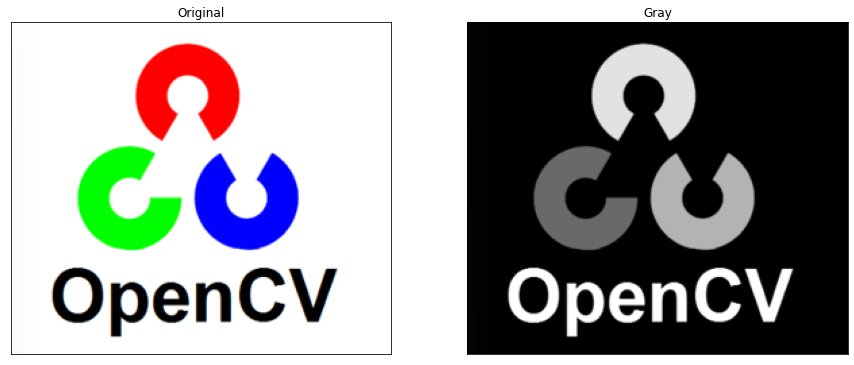

In [38]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [51]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)

In [52]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [141]:
cnt = contours[10]
epsilon = 0.01 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

In [142]:
imgcontour = cv2.imread('opencv.png')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 2)
imgapprox = cv2.imread('opencv.png')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 2)
img = cv2.imread('opencv.png')

In [143]:
cnt.shape, approx.shape

((147, 1, 2), (15, 1, 2))

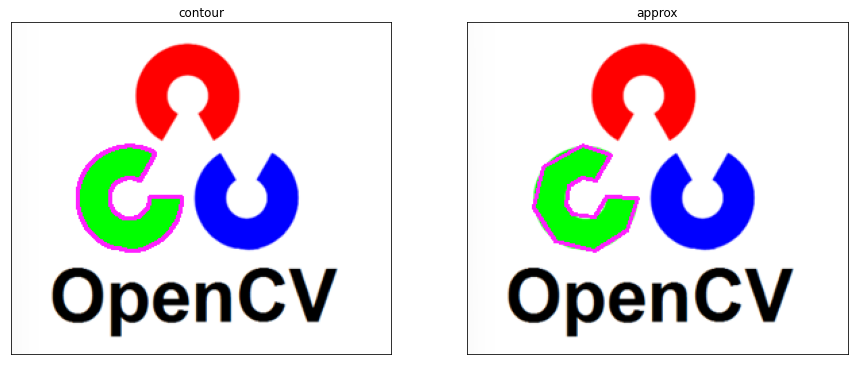

In [144]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('contour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('approx'), plt.xticks([]), plt.yticks([])
plt.show()

In [145]:
hull = cv2.convexHull(approx)

In [146]:
imghull = cv2.imread('opencv.png')
imghull = cv2.drawContours(imghull, [hull], -1, (255,32,255), 3)

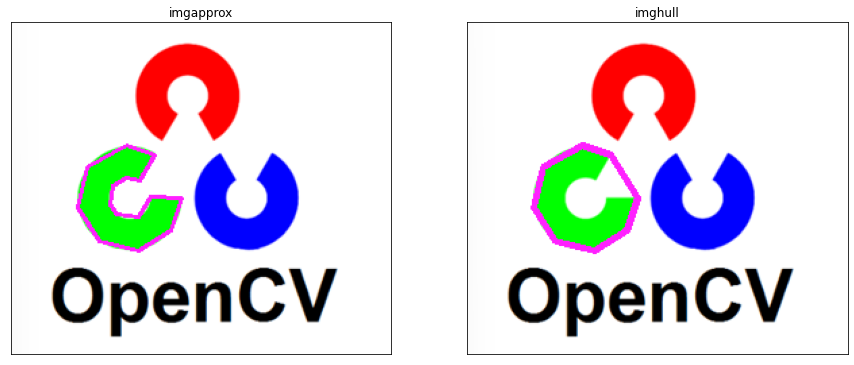

In [147]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [148]:
x,y,w,h = cv2.boundingRect(cnt)
imgbox = cv2.imread('opencv.png')
imgbox = cv2.rectangle(imgbox,(x,y),(x+w,y+h),(255,0,0),2)

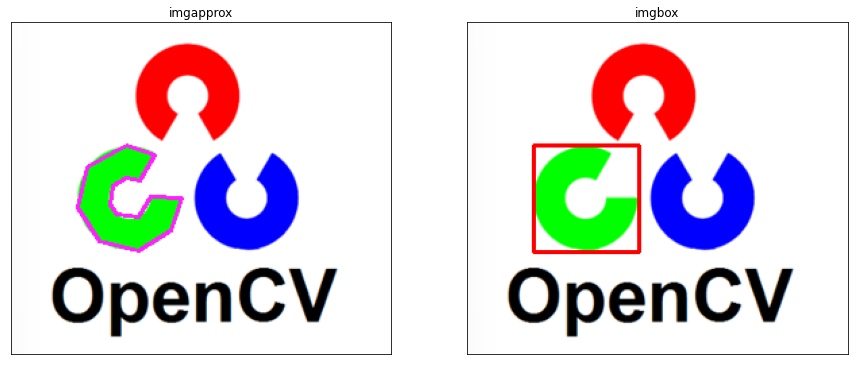

In [149]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgbox,cmap = 'gray')
plt.title('imgbox'), plt.xticks([]), plt.yticks([])
plt.show()

In [150]:
imgcontour = cv2.imread('opencv.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

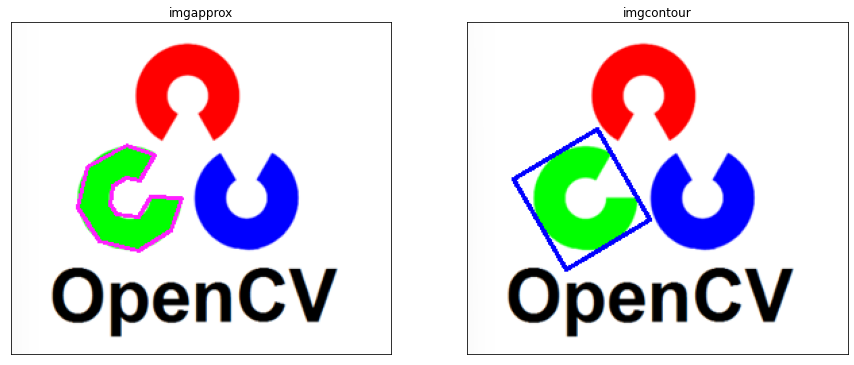

In [151]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [152]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 3360.0, 'm10': 584179.1666666666, 'm01': 454023.8333333333, 'm20': 103241785.16666666, 'm11': 78935134.41666666, 'm02': 62471563.83333333, 'm30': 18532012692.65, 'm21': 13942251829.9, 'm12': 10861019079.133333, 'm03': 8741776083.45, 'mu20': 1674731.962094903, 'mu11': -2741.953414365649, 'mu02': 1121075.3706266433, 'mu30': -245363.25941085815, 'mu21': -7458728.857496113, 'mu12': 276139.8118698597, 'mu03': -2738428.5717315674, 'nu20': 0.1483428963023405, 'nu11': -0.000242874274940268, 'nu02': 0.09930160241520014, 'nu30': -0.0003749396232980288, 'nu21': -0.011397684375511566, 'nu12': 0.00042196927644617, 'nu03': -0.004184592997251959}


In [153]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [154]:
area = cv2.contourArea(cnt)

In [155]:
perimeter = cv2.arcLength(cnt,True)

In [158]:
imginfo = cv2.imread('opencv.png')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

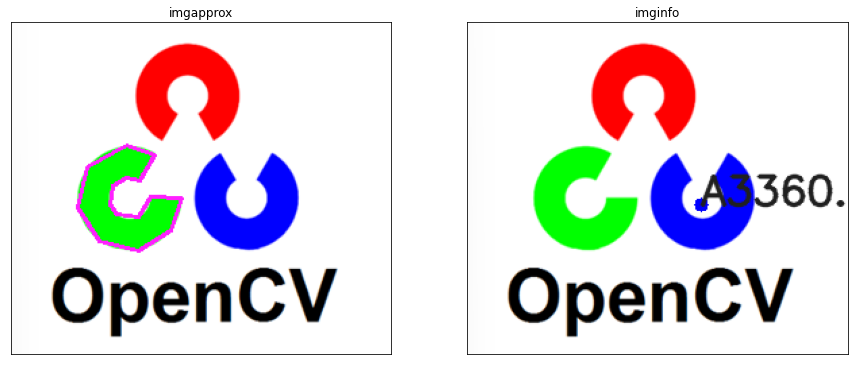

In [159]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()